In [1]:
import boto3

client=boto3.client('sts')
account=client.get_caller_identity()['Account']

my_session=boto3.session.Session()
region=my_session.region_name

algorithm_name="pytorch-tft-container-test"
ecr_image='{}.dkr.ecr.{}.amazonaws.com/{}:latest'.format(account, region, algorithm_name)

ecr_image

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


'551329315830.dkr.ecr.us-east-1.amazonaws.com/pytorch-tft-container-test:latest'

Files already downloaded and verified
Files already downloaded and verified
     deer      frog      deer       car


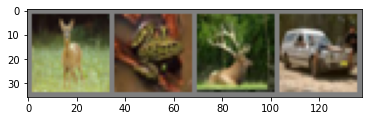

In [2]:
import numpy as np
import torchvision, torch
from utils_cifar import get_train_data_loader, get_test_data_loader, imshow, classes
import sagemaker
import uuid

sagemaker_session = sagemaker.Session()
bucket = sagemaker_session.default_bucket()

trainloader = get_train_data_loader()
testloader = get_test_data_loader()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%9s' % classes[labels[j]] for j in range(4)))
inputs = sagemaker_session.upload_data(path='data', bucket=bucket, key_prefix='data/cifar10')


In [7]:
import sagemaker

from sagemaker import get_execution_role
from sagemaker.estimator import Estimator

estimator=Estimator(
    image_uri=ecr_image,
    role=get_execution_role(),
    base_job_name=algorithm_name,
    instance_count=1,
    instance_type='ml.p2.xlarge',
    input_mode = "Pipe"
)

# start training
estimator.fit(inputs)

# # deploy the trained model
# predictor=estimator.deploy(1, instance_type)

2022-08-21 02:43:35 Starting - Starting the training job...
2022-08-21 02:44:01 Starting - Preparing the instances for trainingProfilerReport-1661049815: InProgress
.........
2022-08-21 02:45:29 Downloading - Downloading input data......
2022-08-21 02:46:24 Training - Downloading the training image............
2022-08-21 02:48:31 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-08-21 02:48:34,835 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2022-08-21 02:48:34,869 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-08-21 02:48:34,888 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-08-21 02:48:34,981 sagemaker-training-toolkit INFO     Invoking user script
Training Env:
{
    "additional_framework_parameters": {},
    "channel_input_

#015                                                         #033[A#015Epoch 0: 100%|██████████| 31/31 [00:18<00:00,  1.67it/s, loss=101, v_num=0, train_loss_step=90.30, val_loss=125.0, train_loss_epoch=115.0]#015Epoch 0:   0%|          | 0/31 [00:00<?, ?it/s, loss=101, v_num=0, train_loss_step=90.30, val_loss=125.0, train_loss_epoch=115.0]         #015Epoch 1:   0%|          | 0/31 [00:00<?, ?it/s, loss=101, v_num=0, train_loss_step=90.30, val_loss=125.0, train_loss_epoch=115.0]#015Epoch 1:   3%|▎         | 1/31 [00:00<00:29,  1.03it/s, loss=101, v_num=0, train_loss_step=90.30, val_loss=125.0, train_loss_epoch=115.0]#015Epoch 1:   3%|▎         | 1/31 [00:00<00:29,  1.03it/s, loss=98.8, v_num=0, train_loss_step=68.80, val_loss=125.0, train_loss_epoch=115.0]#015Epoch 1:   6%|▋         | 2/31 [00:01<00:20,  1.40it/s, loss=98.8, v_num=0, train_loss_step=68.80, val_loss=125.0, train_loss_epoch=115.0]#015Epoch 1:   6%|▋         | 2/31 [00:01<00:20,  1.40it/s, loss=95.3, v_num=0, train_loss_

#015                                                         #033[A#015Epoch 1: 100%|██████████| 31/31 [00:17<00:00,  1.72it/s, loss=74.1, v_num=0, train_loss_step=70.40, val_loss=103.0, train_loss_epoch=74.10]#015Epoch 1:   0%|          | 0/31 [00:00<?, ?it/s, loss=74.1, v_num=0, train_loss_step=70.40, val_loss=103.0, train_loss_epoch=74.10]         #015Epoch 2:   0%|          | 0/31 [00:00<?, ?it/s, loss=74.1, v_num=0, train_loss_step=70.40, val_loss=103.0, train_loss_epoch=74.10]#015Epoch 2:   3%|▎         | 1/31 [00:00<00:27,  1.09it/s, loss=74.1, v_num=0, train_loss_step=70.40, val_loss=103.0, train_loss_epoch=74.10]#015Epoch 2:   3%|▎         | 1/31 [00:00<00:27,  1.08it/s, loss=73.5, v_num=0, train_loss_step=66.90, val_loss=103.0, train_loss_epoch=74.10]#015Epoch 2:   6%|▋         | 2/31 [00:01<00:19,  1.45it/s, loss=73.5, v_num=0, train_loss_step=66.90, val_loss=103.0, train_loss_epoch=74.10]#015Epoch 2:   6%|▋         | 2/31 [00:01<00:20,  1.45it/s, loss=73.4, v_num=0, train_l


2022-08-21 02:50:07 Uploading - Uploading generated training model
2022-08-21 02:50:07 Completed - Training job completed
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 1.3 K 
3  | prescalers                         | ModuleDict                      | 256   
4  | static_variable_selection          | VariableSelectionNetwork        | 3.4 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 8.0 K 
6  | decoder_variable_selection         | VariableSelect